# Case Study: NHANES Dataset

This notebook analyzes the NHANES dataset, focusing on **uninvariate analysis**.

The [NHANES Dataset](https://wwwn.cdc.gov/nchs/nhanes/Default.aspx) contains the results of the National Health and Nutrition Examination Survey, from the CDC (USA). We have many variables in code in it.
The codebooks for the 2015-2016 wave of NHANES can be found here:

https://wwwn.cdc.gov/nchs/nhanes/continuousnhanes/default.aspx?BeginYear=2015

And here:

https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm

Direct links:

- [Demographics code book](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm)
- [Body measures code book](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm)
- [Blood pressure code book](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm)
- [Alcohol questionaire code book](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/ALQ_I.htm)
- [Smoking questionaire code book](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/SMQ_I.htm)

The commands in this file were written mainly while following a lab notebook on Coursera on the same topic.

Overview:
1. Categorical Data: Frequency Tables
2. Quantitative Variables: Numerical Summaries
3. Graphical Summaries: Histograms & Boxplots
4. Stratification
5. Practice exercises


In [242]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [243]:
da = pd.read_csv("nhanes_2015_2016.csv")

### 1. Categorical Data: Frequency Tables

Example variables:
- [DMDEDUC2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2): education level in adults.
- RIAGENDR: gender.
- [DMDMARTL](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDMARTL): marital status.
- [DMDHHSIZ]: total number of people in household.

In [244]:
# Count number of category levels
da.DMDEDUC2.value_counts()

4.0    1621
5.0    1366
3.0    1186
1.0     655
2.0     643
9.0       3
Name: DMDEDUC2, dtype: int64

In [245]:
da.DMDEDUC2.value_counts().sum()

5474

In [246]:
da.DMDEDUC2.shape

(5735,)

We see there is a discrepancy: missing values.

In [247]:
pd.isnull(da.DMDEDUC2).sum()

261

In [248]:
# Check that numbers add up: total - null - nonull = 0
da.DMDEDUC2.shape[0] - da.DMDEDUC2.value_counts().sum() - pd.isnull(da.DMDEDUC2).sum()

0

In [249]:
# We might want to create a new variable (e.g., var_x)
# which contains human readable labels for the different category levels
da["DMDEDUC2x"] = da.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 
                                       7: "Refused", 9: "Don't know"})
da.DMDEDUC2x.value_counts()

Some college/AA    1621
College            1366
HS/GED             1186
<9                  655
9-11                643
Don't know            3
Name: DMDEDUC2x, dtype: int64

In [250]:
# Similar for gender
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})

In [251]:
# Proportions
x = da.DMDEDUC2x.value_counts()
x / x.sum()

Some college/AA    0.296127
College            0.249543
HS/GED             0.216661
<9                 0.119657
9-11               0.117464
Don't know         0.000548
Name: DMDEDUC2x, dtype: float64

In [252]:
# Create a category-evel for missing cases (null)
# Sometimes we want to do that instead of eliminating/ignoring those cases
da["DMDEDUC2x"] = da.DMDEDUC2x.fillna("Missing")
x = da.DMDEDUC2x.value_counts()
x / x.sum()

Some college/AA    0.282650
College            0.238187
HS/GED             0.206800
<9                 0.114211
9-11               0.112119
Missing            0.045510
Don't know         0.000523
Name: DMDEDUC2x, dtype: float64

### 2. Quantitative Variables: Numerical Summaries

Example variables:
- [BMXWT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXWT): weight (kg).
- [BPXSY1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY1): systolic (SY) blood pressure (BPX), 1st measurement. A person is generally considered to have pre-hypertension when their systolic blood pressure is between 120 and 139, or their diastolic (DI instead of SY) blood pressure is between 80 and 89. Three measurements are taken because of the "white coat anxiety": blood pressure might be slightly elevated in the first measurement due to anxiety, but it decreases in following measurements.
- RIDAGEYR: age (years).
- BMXHT: height (cm).

In [253]:
# describe() provides numerical summaries of quantitative data
# Note: use dropna() before applying any describe()
da.BMXWT.dropna().describe()

count    5666.000000
mean       81.342676
std        21.764409
min        32.400000
25%        65.900000
50%        78.200000
75%        92.700000
max       198.900000
Name: BMXWT, dtype: float64

In [254]:
# Manual summaries
x = da.BMXWT.dropna() # Extract all non-missing values of BMXWT into a variable called 'x'
print(x.mean()) # Pandas method
print(np.mean(x)) # Numpy function
print(x.median())
print(np.percentile(x, 50)) # 50th percentile, same as the median
print(np.percentile(x, 75)) # 75th percentile
print(x.quantile(0.75)) # Pandas method for quantiles, equivalent to 75th percentile

81.34267560889509
81.34267560889509
78.2
78.2
92.7
92.7


In [255]:
# Number of people with pre-hypertension
# Note we apply logic operators
# and then we compute the mean of the True/1 values
np.mean((da.BPXSY1 >= 120) & (da.BPXSY2 <= 139))

0.3741935483870968

In [256]:
np.mean((da.BPXDI1 >= 80) & (da.BPXDI2 <= 89))

0.14803836094158676

In [257]:
# Combined: hypertension according to SY or DI
a = (da.BPXSY1 >= 120) & (da.BPXSY2 <= 139)
b = (da.BPXDI1 >= 80) & (da.BPXDI2 <= 89)
print(np.mean(a | b))

0.43975588491717527


In [258]:
# Is the white coat anxiety?
# Mean differences between 1st and 2nd measurements
# The differences seem to be rather small
print(np.mean(da.BPXSY1))
print(np.mean(da.BPXDI1))
print(np.mean(da.BPXSY1 - da.BPXSY2))
print(np.mean(da.BPXDI1 - da.BPXDI2))

125.08461396037771
69.5163858544714
0.6749860309182343
0.3490407897187558


### 3. Graphical Summaries: Histograms & Boxplots

<AxesSubplot:xlabel='BMXWT', ylabel='Density'>

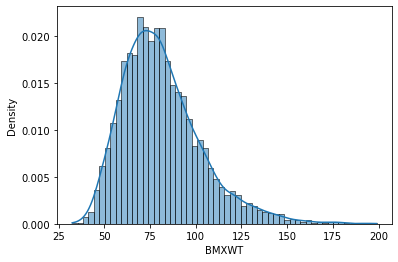

In [259]:
# Weight: Histogram - use dropna()
# Right skewed
#sns.distplot(da.BMXWT.dropna()) # distplot is deprecated, use histplot
sns.histplot(da.BMXWT.dropna(),kde=True,stat='density')

<AxesSubplot:xlabel='BPXSY1', ylabel='Density'>

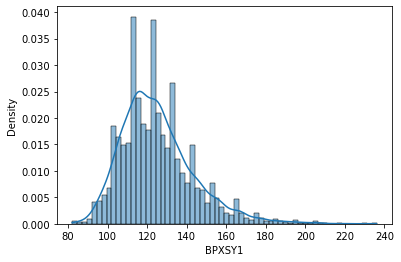

In [260]:
# Systolic blood pressure: Histogram
# We see some bumps - are there some rouding tendencies? (e.g., nearest 5 or 10 units)
sns.histplot(da.BPXSY1.dropna(),kde=True,stat='density')

Text(0, 0.5, 'Blood pressure in mm/Hg')

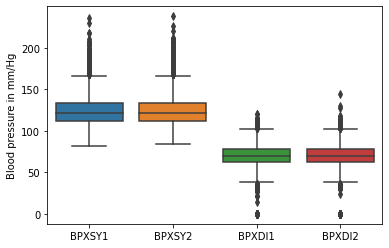

In [261]:
# Boxplot: Systolic and Distolic, 1st and 2nd measurement
# Note: it is different if we pass data or x & y
# - data: we can pass several quantitative variables
# - x & y: x quatitative variable is stratified/grouped according to qualitative/categorical y
bp = sns.boxplot(data=da.loc[:, ["BPXSY1", "BPXSY2", "BPXDI1", "BPXDI2"]])
# Same command as before:
#bp = sns.boxplot(data=da[["BPXSY1", "BPXSY2", "BPXDI1", "BPXDI2"]])
bp.set_ylabel("Blood pressure in mm/Hg")

### 4. Stratification

We can get more insights from a dataset if we stratify the information in different strata that are more homogeneous. That is particularly true for human measurements; we can create groups according to age, gender, race, etc.

In [262]:
# Create age strata based on these cut points
da["agegrp"] = pd.cut(da.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])

In [263]:
# Our new variable contains the age range/cut for each person/measurement
da["agegrp"].value_counts()

(18, 30]    1153
(30, 40]     932
(50, 60]     924
(40, 50]     903
(60, 70]     878
(70, 80]     812
Name: agegrp, dtype: int64

<AxesSubplot:xlabel='agegrp', ylabel='BPXSY1'>

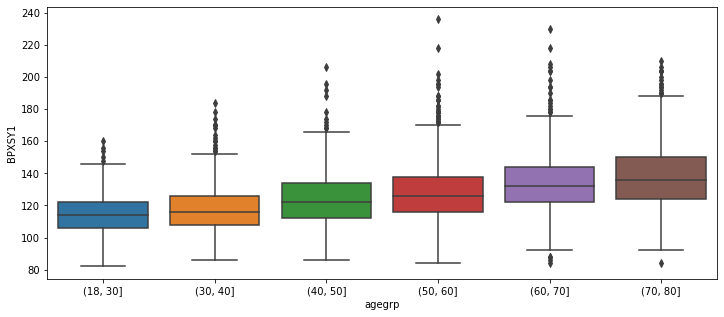

In [264]:
plt.figure(figsize=(12, 5))
# Make boxplot of BPXSY1 stratified by age group
# The older, the higher the systolic blood pressure
sns.boxplot(x="agegrp", y="BPXSY1", data=da)

<AxesSubplot:xlabel='agegrp', ylabel='BPXSY1'>

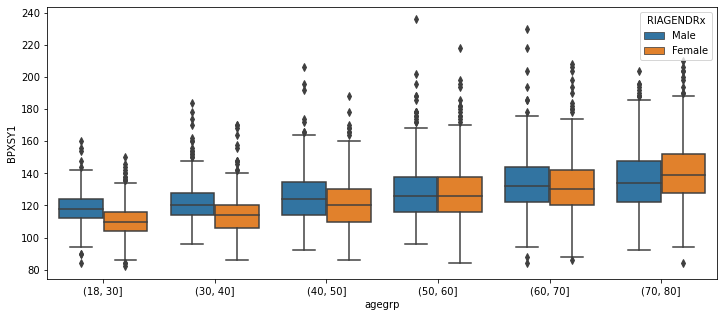

In [265]:
# We further add a hue variable: gender
# Women have a lower blood pressure, except at older ages
# Maybe that is because male with high blood pressure die younger?
da["agegrp"] = pd.cut(da.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])
plt.figure(figsize=(12, 5))
sns.boxplot(x="agegrp", y="BPXSY1", hue="RIAGENDRx", data=da)

<AxesSubplot:xlabel='RIAGENDRx', ylabel='BPXSY1'>

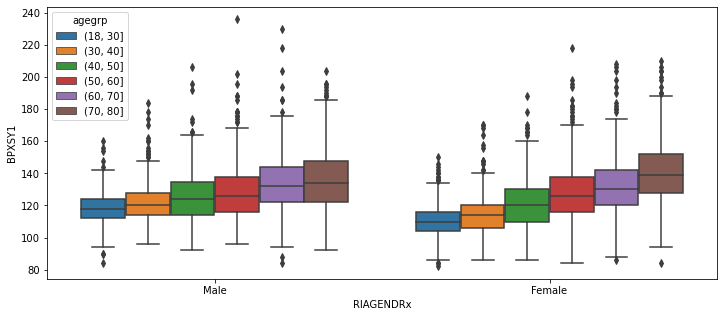

In [266]:
# We can stratify the opposite way: instead of age & gender, gender & age
# Just swap x & hue
da["agegrp"] = pd.cut(da.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])
plt.figure(figsize=(12, 5))
sns.boxplot(x="RIAGENDRx", y="BPXSY1", hue="agegrp", data=da)

#### Stratification for Categorical Variables

In [267]:
da.groupby("agegrp")["DMDEDUC2x"].value_counts()

agegrp    DMDEDUC2x      
(18, 30]  Some college/AA    364
          College            278
          HS/GED             237
          Missing            128
          9-11                99
          <9                  47
(30, 40]  Some college/AA    282
          College            264
          HS/GED             182
          9-11               111
          <9                  93
(40, 50]  Some college/AA    262
          College            260
          HS/GED             171
          9-11               112
          <9                  98
(50, 60]  Some college/AA    258
          College            220
          HS/GED             220
          9-11               122
          <9                 104
(60, 70]  Some college/AA    238
          HS/GED             192
          College            188
          <9                 149
          9-11               111
(70, 80]  Some college/AA    217
          HS/GED             184
          <9                 164
          College

Note on **causality and confounding**. From the [Wikipedia](https://en.wikipedia.org/wiki/Confounding): "a confounder
is a variable that influences both the dependent variable and independent variable, causing a spurious association". Thus it seems there is causality between the dependent and the independent variable, but in reality there is not!

While age might cause higher blood pressure, age probably does not cause educational levels to vary as they do. That is so because we have a "birth cohort effect": people in their 20's now are more likely to go to college and the survey was done at the same point in time (cross sectional survey) for all ages.

**Advanced stratified table**: percentage of education level stratified by age group and gender.

In [268]:
# Eliminate rare/missing values
dx = da.loc[~da.DMDEDUC2x.isin(["Don't know", "Missing"]), :] 
dx = dx.groupby(["agegrp", "RIAGENDRx"])["DMDEDUC2x"]
dx = dx.value_counts()
# Restructure the results from 'long' to 'wide'
dx = dx.unstack()
# Normalize within each stratum to get proportions
dx = dx.apply(lambda x: x/x.sum(), axis=1)
# Limit display to 3 decimal places
print(dx.to_string(float_format="%.3f"))

DMDEDUC2x           9-11    <9  College  HS/GED  Some college/AA
agegrp   RIAGENDRx                                              
(18, 30] Female    0.080 0.049    0.282   0.215            0.374
         Male      0.117 0.042    0.258   0.250            0.333
(30, 40] Female    0.089 0.097    0.314   0.165            0.335
         Male      0.151 0.103    0.251   0.227            0.269
(40, 50] Female    0.110 0.106    0.299   0.173            0.313
         Male      0.142 0.112    0.274   0.209            0.262
(50, 60] Female    0.117 0.102    0.245   0.234            0.302
         Male      0.148 0.123    0.231   0.242            0.256
(60, 70] Female    0.118 0.188    0.195   0.206            0.293
         Male      0.135 0.151    0.233   0.231            0.249
(70, 80] Female    0.105 0.225    0.149   0.240            0.281
         Male      0.113 0.180    0.237   0.215            0.255


### 5. Practice Exercises

These exercises consist basically in modifying the code above.

In [269]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

da = pd.read_csv("nhanes_2015_2016.csv")

In [270]:
da.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

#### Q1: Re-Label & Stratify
Re-label marital status to have clear names: [DMDMARTL](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDMARTL).

In [271]:
da["DMDMARTL"].unique()

array([ 1.,  3.,  6.,  4.,  5., nan,  2., 77.])

In [272]:
da["DMDMARTL"].value_counts()

1.0     2780
5.0     1004
3.0      579
6.0      527
2.0      396
4.0      186
77.0       2
Name: DMDMARTL, dtype: int64

In [273]:
# Check null values
pd.isnull(da.DMDMARTL).sum()

261

In [274]:
# Check that all values sum up
da.DMDMARTL.shape[0] - da.DMDMARTL.value_counts().sum() - pd.isnull(da.DMDMARTL).sum()

0

In [275]:
# Re-label to create a new variable (e.g., var_x)
# which contains human readable labels for the different category levels
# Note that dictionaries can contain values of different type,
# but a pandas column/series can have a unique type!
# In our case, there occurs no '.' category in DMDMARTL
da["DMDMARTLx"] = da.DMDMARTL.replace({1: "Married", 2: "Widowed", 3: "Divorced", 4: "Separated", 5: "Never Married", 
                                       6: "Living with partner", 77: "Refused", 99: "Don't know", ".":"Missing"})
da.DMDMARTLx.value_counts()

Married                2780
Never Married          1004
Divorced                579
Living with partner     527
Widowed                 396
Separated               186
Refused                   2
Name: DMDMARTLx, dtype: int64

##### Q1a,b,c: Stratify in Gender & Age Group
Comment differences:
- Male & Female all ages: While there are roughly 13% more men married, the number of women divorced, widowed or separated is close to the double.
- Male & Female in (30,40] age range: Similar numbers both for male and female, but: roughly double women divorced and around 30% of more male living with partner.

In [276]:
# Create age strata based on these cut points
da["agegrp"] = pd.cut(da.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])

In [277]:
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})

In [278]:
da.groupby("RIAGENDRx")["DMDMARTLx"].value_counts()

RIAGENDRx  DMDMARTLx          
Female     Married                1303
           Never Married           520
           Divorced                350
           Widowed                 296
           Living with partner     262
           Separated               118
           Refused                   1
Male       Married                1477
           Never Married           484
           Living with partner     265
           Divorced                229
           Widowed                 100
           Separated                68
           Refused                   1
Name: DMDMARTLx, dtype: int64

In [279]:
da.groupby("agegrp")["DMDMARTLx"].value_counts()

agegrp    DMDMARTLx          
(18, 30]  Never Married          521
          Married                262
          Living with partner    209
          Separated               18
          Divorced                13
          Widowed                  2
(30, 40]  Married                516
          Never Married          186
          Living with partner    129
          Divorced                67
          Separated               29
          Widowed                  4
          Refused                  1
(40, 50]  Married                570
          Divorced               103
          Never Married          102
          Living with partner     70
          Separated               44
          Widowed                 14
(50, 60]  Married                553
          Divorced               140
          Never Married           89
          Living with partner     66
          Widowed                 38
          Separated               37
          Refused                  1
(60, 70]

#### Q2: For Males / Females, Analyze Marital Status Fequency Tables by Age

In [280]:
# Females
dx = da.loc[~da.RIAGENDRx.isin(["Male"]), :]
dx = dx.groupby(["agegrp"])["DMDMARTLx"].value_counts()
dx = dx.unstack()
dx = dx.apply(lambda x: x/x.sum(), axis=1)
dx

DMDMARTLx,Divorced,Living with partner,Married,Never Married,Refused,Separated,Widowed
agegrp,,,,,,,
"(18, 30]",0.019892,0.206148,0.285714,0.468354,NaN,0.019892,NaN
"(30, 40]",0.090717,0.120253,0.544304,0.204641,NaN,0.035865,0.004219
"(40, 50]",0.137450,0.073705,0.573705,0.125498,NaN,0.065737,0.023904
"(50, 60]",0.176596,0.068085,0.546809,0.089362,0.002128,0.057447,0.059574
"(60, 70]",0.192744,0.043084,0.480726,0.086168,NaN,0.049887,0.147392
"(70, 80]",0.143902,0.007317,0.317073,0.051220,NaN,0.019512,0.460976


In [281]:
# Males
dx = da.loc[~da.RIAGENDRx.isin(["Female"]), :]
dx = dx.groupby(["agegrp"])["DMDMARTLx"].value_counts()
dx = dx.unstack()
dx = dx.apply(lambda x: x/x.sum(), axis=1)
dx

DMDMARTLx,Divorced,Living with partner,Married,Never Married,Refused,Separated,Widowed
agegrp,,,,,,,
"(18, 30]",0.004237,0.201271,0.220339,0.555085,NaN,0.014831,0.004237
"(30, 40]",0.052402,0.157205,0.563319,0.194323,0.002183,0.026201,0.004367
"(40, 50]",0.084788,0.082294,0.703242,0.097257,NaN,0.027431,0.004988
"(50, 60]",0.125551,0.074890,0.651982,0.103524,NaN,0.022026,0.022026
"(60, 70]",0.125858,0.050343,0.665904,0.086957,NaN,0.032037,0.038902
"(70, 80]",0.141791,0.022388,0.611940,0.022388,NaN,0.034826,0.166667


Comments:
- Younger women in (18,30] divorce more often; then, at (30, 40], their divorce rate drops and starts increasing until (60, 70], age range in which the rate is similar to th eone in rage (18,30]. This is probably related to having children and creating a family: when young, there is no urge, when adult the probability of having a family is higher, which keeps marriages together, and when children are raised and leave home, couples divorce. At the oldest ages the divorce rate decreases again, probably due to defunctions.
- In the case of males the divorce rate increases by age group. The rate is very low at age range (18,30], then there is a jump and it increases steadily.

#### Q3: Height Distributions and Boxplots Stratified by Gender

Both distributions of height for women and men are unimodal, symmetric and normally distributed. Means are clearly different. Boxplots more clearly the outliers outside of the whiskers; note that female outliers define the lower bound of all outliers and male outliers the upper bound.

<AxesSubplot:xlabel='BMXHT', ylabel='Count'>

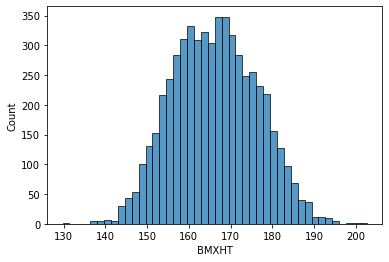

In [282]:
# Usually NA values need to be dropped
sns.histplot(da["BMXHT"].dropna())

<AxesSubplot:xlabel='BMXHT', ylabel='Count'>

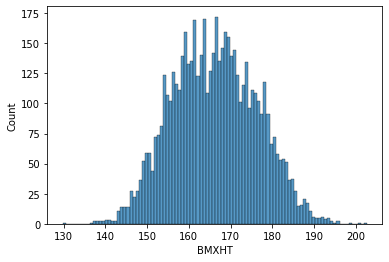

In [283]:
# Try different bin values to see effects like rounding, etc.
sns.histplot(da["BMXHT"].dropna(),bins=100)

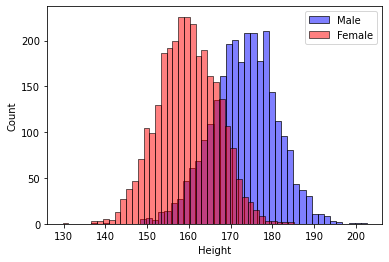

In [284]:
sns.histplot(da[da["RIAGENDRx"]=="Male"]["BMXHT"].dropna(),color='blue',alpha=0.5)
sns.histplot(da[da["RIAGENDRx"]=="Female"]["BMXHT"].dropna(),color='red',alpha=0.5)
plt.xlabel('Height')
plt.legend(['Male','Female'])
plt.show()

<AxesSubplot:xlabel='BMXHT', ylabel='RIAGENDRx'>

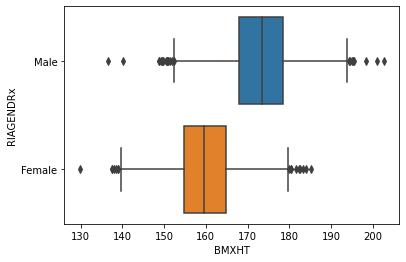

In [285]:
sns.boxplot(x = da["BMXHT"].dropna(), y = da["RIAGENDRx"])

#### Q4: Boxplots of Blood Pressure

<AxesSubplot:>

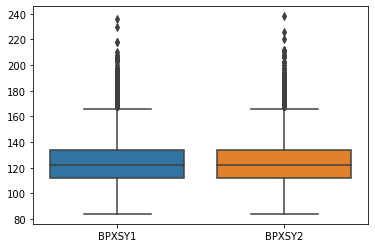

In [286]:
# First and Second Systolic blood pressure
# Note: it is different if we pass data or x & y
# - data: we can pass several quantitative variables
# - x & y: x quatitative variable is stratified/grouped according to qualitative/categorical y
sns.boxplot(data = da[["BPXSY1","BPXSY2"]].dropna())

In [287]:
# Proportion of samples with second measurement lower
dx = da["BPXSY1"]-da["BPXSY2"]
dx = dx.dropna()
dx[dx>0].count()/dx.count()

0.45874464518532315

#### Q5: Grouping in Frequency Tables

Grouping by
- total number of people in household (DMDHHSIZ)
- education attainment (DMDEDUC2)
- age
- gender

In [291]:
da["DMDEDUC2x"] = da.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 
                                       7: "Refused", 9: "Don't know"})
da.DMDEDUC2x.value_counts()

Some college/AA    1621
College            1366
HS/GED             1186
<9                  655
9-11                643
Don't know            3
Name: DMDEDUC2x, dtype: int64

In [292]:
da.groupby("DMDEDUC2x")["DMDHHSIZ"].value_counts()

DMDEDUC2x        DMDHHSIZ
9-11             2           143
                 3           105
                 4            98
                 5            94
                 1            75
                 6            73
                 7            55
<9               2           147
                 5            97
                 3            96
                 4            87
                 7            85
                 1            72
                 6            71
College          2           475
                 3           265
                 4           226
                 1           195
                 5           130
                 6            40
                 7            35
Don't know       2             2
                 5             1
HS/GED           2           321
                 3           203
                 4           192
                 1           181
                 5           130
                 7            81
                 

In [293]:
dx = da.groupby("DMDEDUC2x")["DMDHHSIZ"].value_counts()
dx = dx.unstack()
dx = dx.apply(lambda x: x/x.sum(), axis=1)
dx

DMDHHSIZ,1,2,3,4,5,6,7
DMDEDUC2x,,,,,,,
9-11,0.116641,0.222395,0.163297,0.152411,0.146190,0.113530,0.085537
<9,0.109924,0.224427,0.146565,0.132824,0.148092,0.108397,0.129771
College,0.142753,0.347731,0.193997,0.165447,0.095168,0.029283,0.025622
Don't know,NaN,0.666667,NaN,NaN,0.333333,NaN,NaN
HS/GED,0.152614,0.270658,0.171164,0.161889,0.109612,0.065767,0.068297
Some college/AA,0.151141,0.268970,0.193091,0.169031,0.122147,0.050586,0.045034


People who live in a houshold of 2 or 3 people are the ones most likely to have a higher education level.

In [360]:
# Restrict the sample to people between 30 and 40 years of age.
# Then calculate the median household size for women and men
# within each level of educational attainment.
dx = da[(da['RIDAGEYR']>30) & (da['RIDAGEYR']<=40)]
dx = dx.groupby(["RIAGENDRx","DMDEDUC2x"])["DMDHHSIZ"].median()
dx

RIAGENDRx  DMDEDUC2x      
Female     9-11               5.0
           <9                 5.0
           College            4.0
           HS/GED             5.0
           Some college/AA    4.0
Male       9-11               5.0
           <9                 5.0
           College            3.0
           HS/GED             4.0
           Some college/AA    4.0
Name: DMDHHSIZ, dtype: float64

#### Q6

The participants can be clustered into "masked variance units" (MVU) based on every combination of the variables [SDMVSTRA](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVSTRA) and [SDMVPSU](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVPSU).  Calculate the mean age ([RIDAGEYR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDAGEYR)), height ([BMXHT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXHT)), and BMI ([BMXBMI](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXBMI)) for each gender ([RIAGENDR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIAGENDR)), within each MVU, and report the ratio between the largest and smallest mean (e.g. for height) across the MVUs.

In [367]:
dx = da.groupby(["SDMVSTRA","SDMVPSU","RIAGENDRx"])[["RIDAGEYR","BMXHT","BMXBMI"]].mean()
dx

RIDAGEYR       BMXHT     BMXBMI
SDMVSTRA SDMVPSU RIAGENDRx                                  
119      1       Female     47.663265  159.570408  30.052041
                 Male       47.861111  172.741667  26.958333
         2       Female     52.987952  159.244578  27.849398
                 Male       54.363636  172.906818  27.160465
120      1       Female     43.636364  155.402041  32.419388
                 Male       43.130000  169.537755  30.939175
         2       Female     43.736111  159.218056  27.400000
                 Male       45.219178  173.075342  27.727397
121      1       Female     44.397959  158.871579  30.856842
                 Male       46.750000  172.177885  29.416505
         2       Female     44.376344  160.229032  26.470968
                 Male       42.063158  174.764516  26.273118
122      1       Female     42.897436  161.315385  29.447436
                 Male       44.653061  173.998969  28.528866
         2       Female     47.333333  157.231111  26.611111
                 Male       44.320000  170.332323  25.744444
123      1       Female     44.841121  162.059615  29.905769
                 Male       47.829787  174.315217  29.231522
         2       Female     46.457447  160.476596  30.641489
                 Male       52.126582  174.454430  28.811392
124      1       Female     51.664000  158.788710  29.533065
                 Male       50.750000  172.109009  28.614414
         2       Female     42.541667  162.853521  28.640845
                 Male       48.245614  174.291228  27.714035
125      1       Female     50.900901  160.762385  30.385321
                 Male       55.165289  173.631092  29.727731
         2       Female     51.660000  160.021429  28.564286
                 Male       49.705882  174.456863  29.143564
126      1       Female     46.229167  160.387500  31.262500
                 Male       48.416667  175.149398  29.033333
         2       Female     47.205882  160.892000  29.612121
                 Male       48.666667  174.713043  29.039130
127      1       Female     49.694444  157.422430  32.189720
                 Male       53.137931  171.545349  31.062353
         2       Female     51.486239  159.022936  30.770642
                 Male       54.070588  173.366667  30.557831
128      1       Female     55.638462  156.339063  32.303125
                 Male       53.673267  169.325000  31.749000
         2       Female     45.589744  160.437179  27.491026
                 Male       45.822785  172.400000  26.835443
129      1       Female     45.329787  156.900000  29.019149
                 Male       43.922222  171.094318  26.493182
         2       Female     43.500000  161.034259  29.429630
                 Male       45.775510  173.138298  28.961702
130      1       Female     47.810526  161.977895  30.700000
                 Male       50.516854  176.974157  30.337079
         2       Female     50.833333  160.060577  31.490385
                 Male       50.535354  175.061224  29.237755
131      1       Female     54.893617  161.989362  30.061702
                 Male       53.140187  175.610476  28.259615
         2       Female     45.000000  161.673810  32.984127
                 Male       46.778846  175.091346  30.077885
132      1       Female     43.210526  161.508421  29.848421
                 Male       42.380435  172.534066  28.546154
         2       Female     51.700000  159.138281  30.540625
                 Male       49.038760  172.809524  28.966667
133      1       Female     45.105882  158.295122  27.959259
                 Male       44.054795  171.509722  27.495833
         2       Female     47.063158  158.627368  29.000000
                 Male       47.489796  171.179167  27.966667

In [380]:
# Inter-quartile range (IQR) for age, height, and BMI for each gender and each MVU.
# Report the ratio between the largest and smalles IQR across the MVUs.
dx1 = da.groupby(["SDMVSTRA","SDMVPSU","RIAGENDRx"])[["RIDAGEYR","BMXHT","BMXBMI"]].quantile(0.25)
dx2 = da.groupby(["SDMVSTRA","SDMVPSU","RIAGENDRx"])[["RIDAGEYR","BMXHT","BMXBMI"]].quantile(0.75)

In [379]:
dx=dx2-dx1
dx

RIDAGEYR   BMXHT  BMXBMI
SDMVSTRA SDMVPSU RIAGENDRx                          
119      1       Female        31.25   9.325   9.750
                 Male          29.75   9.000   5.350
         2       Female        33.50   9.950   9.350
                 Male          29.00  11.225   5.300
120      1       Female        26.50   8.750   8.775
                 Male          23.75  12.125   9.400
         2       Female        25.75  10.550   7.750
                 Male          26.00  10.500   7.100
121      1       Female        26.25   9.150   9.000
                 Male          34.50  10.725   7.500
         2       Female        26.00   9.600   8.100
                 Male          25.50   8.600   5.700
122      1       Female        24.00  10.400   9.875
                 Male          29.50   9.400   7.700
         2       Female        25.00   7.575   8.475
                 Male          30.00  10.150   4.100
123      1       Female        30.50   9.675  10.450
                 Male          28.25   9.350   8.050
         2       Female        34.50  11.200   9.975
                 Male          31.50   9.900   8.100
124      1       Female        27.00   8.375   8.950
                 Male          32.00   9.800   6.100
         2       Female        23.50   8.650   9.000
                 Male          31.00  11.600   8.700
125      1       Female        31.00   9.100   8.000
                 Male          29.00  10.350   8.300
         2       Female        32.25  10.675  10.325
                 Male          33.50   7.925   7.900
126      1       Female        30.25   8.500  10.675
                 Male          36.25  10.450   8.000
         2       Female        31.75  12.025  10.350
                 Male          34.00   8.125   6.850
127      1       Female        27.25   7.700  11.750
                 Male          30.00   9.025   8.200
         2       Female        30.00  11.600   9.200
                 Male          28.00  10.750   5.950
128      1       Female        28.00   9.125   8.500
                 Male          33.00   9.950   6.675
         2       Female        22.00  10.650   9.375
                 Male          25.50   9.850   5.800
129      1       Female        24.75  10.375   9.500
                 Male          20.75  12.300   6.025
         2       Female        26.25   8.900   9.725
                 Male          30.75  10.700   5.800
130      1       Female        35.50   8.650  11.200
                 Male          36.00   9.900   6.700
         2       Female        30.25  10.225   8.050
                 Male          28.50   8.625   8.375
131      1       Female        35.75  10.025  11.075
                 Male          36.00  10.500   7.525
         2       Female        24.00   7.575  10.625
                 Male          28.00   7.750   7.850
132      1       Female        30.00  10.950  10.700
                 Male          21.25  10.600   6.600
         2       Female        33.00  10.100  11.750
                 Male          38.00  10.550   9.600
133      1       Female        34.00  10.300   8.300
                 Male          33.00   8.925   6.425
         2       Female        28.50   9.550   9.650
                 Male          32.25   8.850   5.900

In [384]:
dx.max()/dx.min()

RIDAGEYR    1.831325
BMXHT       1.623762
BMXBMI      2.865854
dtype: float64

In [386]:
dx = dx.unstack()

In [389]:
dx.max(axis=1)/dx.min(axis=1)

SDMVSTRA  SDMVPSU
119       1          5.841121
          2          6.320755
120       1          3.028571
          2          3.661972
121       1          4.600000
          2          4.561404
122       1          3.831169
          2          7.317073
123       1          3.788820
          2          4.259259
124       1          5.245902
          2          3.583815
125       1          3.875000
          2          4.240506
126       1          4.531250
          2          4.963504
127       1          3.896104
          2          5.042017
128       1          4.943820
          2          4.396552
129       1          4.107884
          2          5.301724
130       1          5.373134
          2          3.757764
131       1          4.784053
          2          3.696370
132       1          4.545455
          2          3.958333
133       1          5.291829
          2          5.466102
dtype: float64